In [2]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
data = loadmat("ex6data1.mat")
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [19]:
X = data['X']
y = data['y'][:, 0]
y = pd.Series(y).map({0: -1, 1: 1}).values

In [5]:
def plot_data(X, y):
    pos_idx = y==1
    neg_idx = y==-1
    plt.plot(X[pos_idx, 0], X[pos_idx, 1], 'X')
    plt.plot(X[neg_idx, 0], X[neg_idx, 1], 'o')
    plt.show()

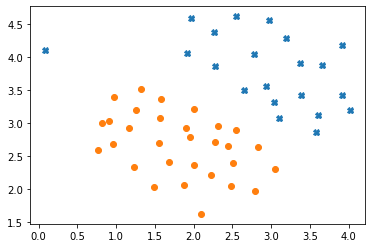

In [6]:
plot_data(X, y)

In [7]:
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    X_norm = X - mu

    sigma = np.std(X_norm, axis=0, ddof=1)
    X_norm /= sigma
    return X_norm, mu, sigma

In [8]:
def CostFunction(X, y, theta, C):
    h = X.dot(theta)
    m = y.size
    #Hinge loss
    K = np.maximum(np.zeros((m,)), 1 - y*h)
    loss = C*np.sum(K) + 1/2*np.sum(theta[1:]**2)
    grad = np.zeros_like(theta)
    for i in range(m):
        if K[i]!=0:
            grad -= C*y[i]*X[i]           
    grad[1:] += theta[1:]
    return loss, grad

In [9]:
def gradient_descent(X, y, theta0, C, learning_rate, maxiter= 1000):
    theta = theta0
    for _ in range(maxiter):
        loss, grad = CostFunction(X, y, theta, C)
        theta -= learning_rate*grad
        print(loss)
    return theta

In [12]:
m = y.size
X_norm, _, _ = featureNormalize(X)
X_expand = np.c_[np.ones((m, 1)), X_norm]
theta0 = np.zeros((3,))
C= 1
learning_rate = 0.01

In [15]:
theta = gradient_descent(X_expand, y, theta0, C, learning_rate, maxiter= 4000)


6.795893617789179
6.795738836744578
6.795499827739888
6.795307379987348
6.795120534360307
6.794881609011911
6.7947214602850305
6.794502499671513
6.794276006150042
6.794123518596503
6.79388473264429
6.793690638303685
6.793505935417787
6.7932672329780335
6.793105588065105
6.792888619488078
6.792660730020189
6.792510134055169
6.7922715707687304
6.792076230808617
6.791893268882001
6.791654788964428
6.791492048713856
6.791276670512105
6.791047785866118
6.790898679908816
6.790660338902091
6.7904641539706985
6.79028253154315
6.7900442737619375
6.789880838701889
6.78966664953575
6.789437170159816
6.78928915295092
6.789051033838492
6.7888544042639705
6.788673720196664
6.7884356841666325
6.788271954505298
6.788058553356398
6.787828879378757
6.787681549980174
6.787443652377265
6.78724697816795
6.78706683164319
6.786829016979801
6.786665392605649
6.786452378776648
6.786222910005877
6.786075867800491
6.785838191322961
6.7856418721676235
6.785461862688589
6.785224269007941
6.7850611494899695
6.78484

6.703844435725456
6.703617944975025
6.703481519134402
6.703266605950707
6.703069647212665
6.702915383503628
6.702689018557352
6.702533174959726
6.702337963017026
6.702121650370799
6.701987023934173
6.701760784653527
6.70158568290022
6.701410012304256
6.701183848422165
6.701050005167949
6.7008332427048725
6.700639025947451
6.7004827532555895
6.700256714819037
6.700103852241616
6.699906391828842
6.69969321951743
6.699556184987202
6.699330271858038
6.699158549359749
6.698980231302775
6.698754393360586
6.698624168209996
6.698404518990368
6.698214079523895
6.698054760579732
6.697829047725435
6.697680201168284
6.697479455327411
6.697270458144094
6.697129978769823
6.69690439086564
6.696737082105546
6.696555080148411
6.696329567220202
6.696203994346396
6.695980422242267
6.6957947940332865
6.69563139291629
6.695406004719292
6.695262207839095
6.695057140960632
6.694853352355579
6.694708392735096
6.694483129131903
6.694321267250466
6.6941345463018855
6.693912756274139
6.693786078886271
6.69356093

6.608914546831864
6.608773902372391
6.608559985099927
6.6084281761545505
6.608237005961659
6.6080510997159045
6.607914131414316
6.607700326090445
6.60756518629184
6.6073776011234475
6.607188424659153
6.607054980639654
6.606841287140346
6.6067029680555525
6.606518816081465
6.606326520935388
6.606196449398174
6.605982867599529
6.60584152071989
6.605660650185876
6.605465387819092
6.605338537040311
6.605125066818559
6.604980843559755
6.604803102787517
6.6046050245854495
6.6044812429171635
6.604267884148663
6.604120935850749
6.603946173237878
6.603745430510346
6.603624566380494
6.603411318941735
6.6032617968691785
6.603089860889123
6.602886604870369
6.60276850678273
6.602555370550331
6.602403425892049
6.602234165094072
6.602028546942805
6.601913063476959
6.601700038327666
6.601545822197068
6.601379085206208
6.601171256005642
6.601058235816932
6.60084532162762
6.600688985062641
6.600524620579677
6.600314731337568
6.6002040231570565
6.599991219804737
6.5998329137678695
6.599670770569286
6.599

6.572759316668961
6.572703205097571
6.572647104747936
6.5725910156178085
6.572534937704946
6.572513475767748
6.572461202499549
6.572405150548013
6.572349109806305
6.572293080272187
6.572237061943415
6.572216131617402
6.572163435824252
6.572107443423072
6.572051462219814
6.571995492212237
6.571939533398099
6.571919074345678
6.571866016232331
6.571810083312097
6.571754161577886
6.571698251027463
6.571642351658591
6.571622303578403
6.57156894331354
6.571513069804918
6.571457207470439
6.571401356307868
6.571345516314972
6.5713258189418635
6.571272216658116
6.571216402491858
6.571160599487875
6.571104807643935
6.571049026957805
6.5710296200628235
6.570975835856789
6.570920080963727
6.570864337221087
6.570808604626636
6.57075288317815
6.570733706568502
6.570679800500773
6.570624104811822
6.570568420261452
6.570512746847436
6.570457084567545
6.570438078086589
6.57038411018177
6.570328473627926
6.570272848200837
6.570217233898276
6.570161630718021
6.570142734245241
6.570088764491968
6.57003318

6.54917559759005
6.54912420252664
6.5490728177417274
6.549021443233259
6.54899573732264
6.548956292991489
6.548904941786805
6.548853600851849
6.5488022701845665
6.548750949782903
6.548720856603638
6.548685898167378
6.548634601038954
6.548583314169443
6.548532037556795
6.548480771198955
6.548446233367225
6.548415818089477
6.548364574974368
6.54831334210737
6.548262119486434
6.548210907109509
6.548171867275952
6.548146052386027
6.548094863221362
6.548043684294018
6.547992515601947
6.547941357143103
6.5478977579927955
6.547876600685712
6.5478254654086925
6.547774340358217
6.54772322553224
6.547672120928718
6.547623905181153
6.547607462617657
6.547556381165559
6.5475053099292415
6.54745424890666
6.547403198095773
6.547352157494537
6.547336786080464
6.547287613872946
6.547236596387399
6.547185589104839
6.547134592023225
6.547083605140518
6.547063480160695
6.547019159405436
6.546968195608098
6.54691724200301
6.546866298588133
6.5468153653614305
6.546790429651985
6.5467510173935555
6.54670010

6.524423703426251
6.524377258494154
6.524330822850579
6.524307302856375
6.524274617743793
6.524228202627342
6.5241817967934495
6.524135400240261
6.524089012965918
6.524055523012218
6.52403289557131
6.5239865287968755
6.523940171295332
6.523893823064826
6.523847484103503
6.523803970158595
6.523791454314078
6.523745135825481
6.523698826600118
6.5236525266361385
6.5236062359316875
6.523559954484915
6.523542980320752
6.523504027043122
6.523457766037106
6.523411514282827
6.523365271778438
6.523319038522087
6.523291910430608
6.523263198453335
6.5232169856106275
6.523170782010027
6.523124587649683
6.523078402527751
6.523041066587698
6.523022649725455
6.522976484990087
6.522930329487205
6.522884183214963
6.522838046171513
6.5227919183550105
6.522780907833941
6.522736267503646
6.522690160041859
6.522644061801103
6.522597972779535
6.52255189297531
6.522530544908657
6.522496329159147
6.52245026968263
6.522404219417547
6.522358178362057
6.5223121465143175
6.522280407091068
6.522256669627182
6.5222

6.504901486329466
6.504870304193199
6.504827769745415
6.504785243804094
6.504742726367538
6.504700217434043
6.504667453508459
6.504651064788519
6.504608574186424
6.504566092082024
6.50452361847362
6.504481153359512
6.504438696738004
6.50442700418629
6.504389636584371
6.504347198265302
6.504304768433473
6.5042623470871845
6.504219934224742
6.504193403610776
6.5041709530520215
6.504128558467473
6.504086172361417
6.504043794732157
6.504001425578
6.503960005792863
6.503952523289767
6.503910172388986
6.5038678299579615
6.503825495995
6.503783170498407
6.503740853466491
6.503720301083588
6.503692043311148
6.5036497445037575
6.503607454155706
6.5035651722653
6.50352289883085
6.503487333667408
6.503474167350772
6.503431912116396
6.503389665332642
6.5033474269978235
6.503305197110251
6.503262975668232
6.503248133789197
6.5032143360759
6.5031721328051795
6.503129937974691
6.503087751582747
6.503045573627659
6.50301559551945
6.50299701250192
6.502954852693741
6.502912701317102
6.502870558370319
6

6.485883849593355
6.485845112246627
6.48580638264698
6.485767660792867
6.485756262519237
6.4857252483593655
6.485686542731296
6.485647844843967
6.485609154695829
6.485570472285332
6.4855393149280305
6.485528130696056
6.485489464489549
6.485450806015897
6.485412155273554
6.485373512260972
6.485334876976607
6.485318909125031
6.4852926180982315
6.48525399899189
6.485215387608983
6.485176783947966
6.485138188007296
6.485102343795121
6.485095999785079
6.485057420000434
6.485018847931359
6.484980283576313
6.4849417269337515
6.484903178002133
6.484882386560935
6.484861072270393
6.4848225394689
6.4847840143735835
6.484745496982901
6.48470698729531
6.484668485309272
6.484662666095698
6.484626461949148
6.484587976067374
6.484549497882392
6.48451102739266
6.484472564596644
6.484446682906103
6.484430611604015
6.484392164890352
6.484353725865647
6.484315294528362
6.484276870876961
6.484238454909905
6.484227408994757
6.484196584069358
6.484158184158861
6.484119791927963
6.484081407375126
6.484043030

In [16]:
from sklearn import preprocessing

In [58]:
normalized_X = preprocessing.normalize(X)

In [59]:
normalized_X

array([[0.39302563, 0.91952752],
       [0.50790858, 0.86141098],
       [0.54637859, 0.83753832],
       [0.63660029, 0.77119392],
       [0.78148226, 0.62392746],
       [0.7826058 , 0.6225176 ],
       [0.70213706, 0.71204182],
       [0.68358816, 0.72986795],
       [0.56688418, 0.8237975 ],
       [0.48379389, 0.87518197],
       [0.65283116, 0.75750345],
       [0.71097756, 0.7032147 ],
       [0.42775273, 0.90389579],
       [0.45992691, 0.88795678],
       [0.60434613, 0.79672188],
       [0.59626783, 0.80278558],
       [0.68698632, 0.72667035],
       [0.75193682, 0.65923518],
       [0.75548895, 0.65516139],
       [0.67518964, 0.73764419],
       [0.42670099, 0.90439276],
       [0.53149293, 0.84706273],
       [0.57419033, 0.81872185],
       [0.64263419, 0.76617315],
       [0.61542066, 0.78819884],
       [0.73219665, 0.68109329],
       [0.79903928, 0.60127883],
       [0.77304087, 0.63435621],
       [0.72429396, 0.68949131],
       [0.67296081, 0.73967814],
       [0.

In [85]:
grad[1:]

array([-27.938, -19.656])

In [86]:
theta[1:]

array([ 3.67568729, -1.77108719])

## Sklearn

In [20]:
X = data['X']
y = data['y'][:, 0]

In [22]:
from sklearn import svm

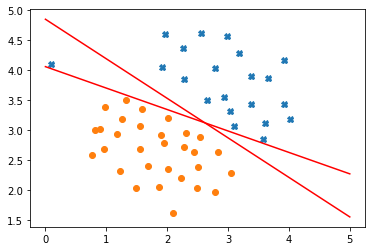

In [24]:
model = svm.SVC(C=1, kernel='linear')
model.fit(X, y)
theta = model.coef_[0]
X1 = np.linspace(0, 5, 50)
X2 = (-theta[0] * X1 - model.intercept_[0]) / theta[1]

pos_idx = y==1
neg_idx = y==0
plt.plot(X[pos_idx, 0], X[pos_idx, 1], 'X')
plt.plot(X[neg_idx, 0], X[neg_idx, 1], 'o')
plt.plot(X1, X2, c='r', label='C=1')

#C=100
model = svm.SVC(C=100, kernel='linear')
model.fit(X, y)
theta = model.coef_[0]
X1 = np.linspace(0, 5, 50)
X2 = (-theta[0] * X1 - model.intercept_[0]) / theta[1]

pos_idx = y==1
neg_idx = y==0
plt.plot(X1, X2, c='r', label='C=100')